In [1]:
import sys
!{sys.executable} -m pip install -q ipywidgets widgetsnbextension scikit-image
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [3]:
from collections import namedtuple
from utils.config_parser import ConfigParser
from train import Trainer

In [4]:
Flags = namedtuple("Flags", ["hyps", "opts"])

In [5]:
FLAGS = Flags("../configs/hyps.json", "../configs/nb_opts.json")

In [6]:
hyps, opts = ConfigParser.parse_configs(FLAGS.hyps, FLAGS.opts)
trainer = Trainer(opts, hyps)

[2022-01-31 15:56:02.706 pytorch-1-8-gpu-py3-ml-g4dn-xlarge-60bd0d07a83be181dcf7335baae2:130 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-01-31 15:56:02.739 pytorch-1-8-gpu-py3-ml-g4dn-xlarge-60bd0d07a83be181dcf7335baae2:130 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Epoch: 1/240 | Training loss: 0.06320579485729971 | Validation Loss: 0.02960259586255601
Epoch: 2/240 | Training loss: 0.022419026180943276 | Validation Loss: 0.01694236473834261
Epoch: 3/240 | Training loss: 0.014304062024630766 | Validation Loss: 0.012332712954029124
Epoch: 4/240 | Training loss: 0.011062551111458464 | Validation Loss: 0.010037219686869612
Epoch: 5/240 | Training loss: 0.009241845552868982 | Validation Loss: 0.00861229963521374
Epoch: 6/240 | Training loss: 0.008108076607273456 | Validation Loss: 0.007769156584238752
Epoch: 7/240 | Training loss: 0.007371158143406377 | Validation Loss: 0.007042438990654464
Ep

../utils/visualize.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(cols * 2, rows * 2))


Epoch: 44/240 | Training loss: 0.003307451361522792 | Validation Loss: 0.003310926808440622
Epoch: 45/240 | Training loss: 0.003289320524732404 | Validation Loss: 0.0033164965286058314
Epoch: 46/240 | Training loss: 0.003284167198642613 | Validation Loss: 0.003306259460588719
Epoch: 47/240 | Training loss: 0.0032607237461637307 | Validation Loss: 0.0032569080184986616
Epoch: 48/240 | Training loss: 0.0032562868610182976 | Validation Loss: 0.00324360497216595
Epoch: 49/240 | Training loss: 0.0032405582432476604 | Validation Loss: 0.0032504360201431716
Epoch: 50/240 | Training loss: 0.003219867302253446 | Validation Loss: 0.00324689757395932
Epoch: 51/240 | Training loss: 0.003206436539643464 | Validation Loss: 0.0032193895498726596
Epoch: 52/240 | Training loss: 0.003187079366514499 | Validation Loss: 0.0032183744578047637
Epoch: 53/240 | Training loss: 0.0031867574509035082 | Validation Loss: 0.0031976194091220484
Epoch: 54/240 | Training loss: 0.0031623815327506276 | Validation Loss: 

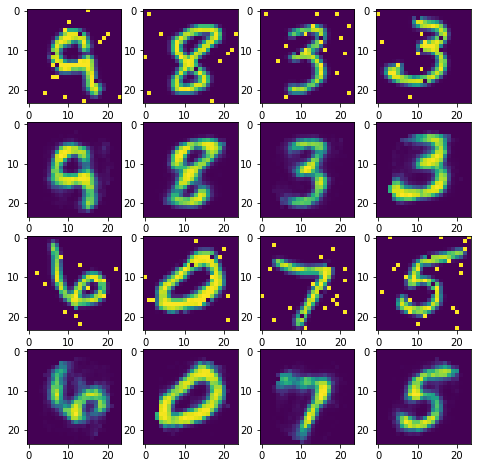

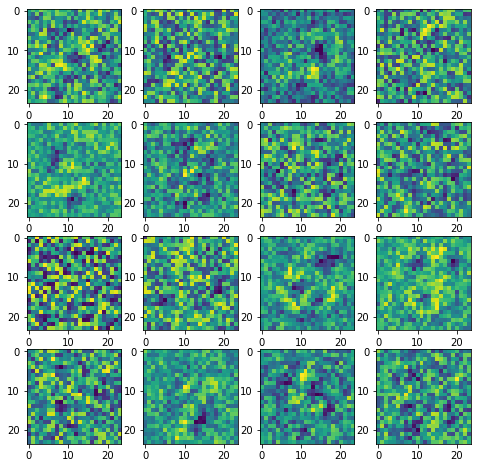

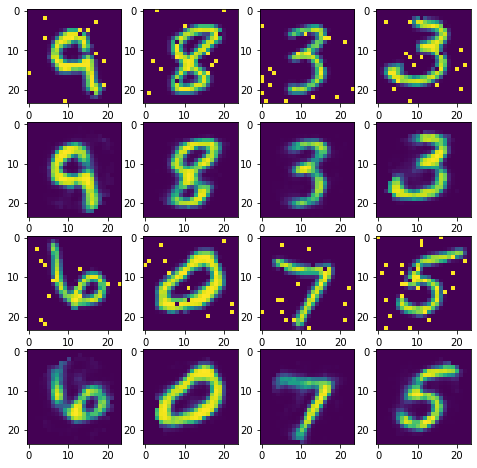

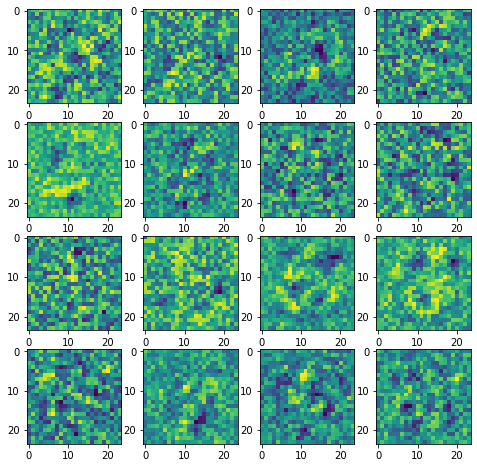

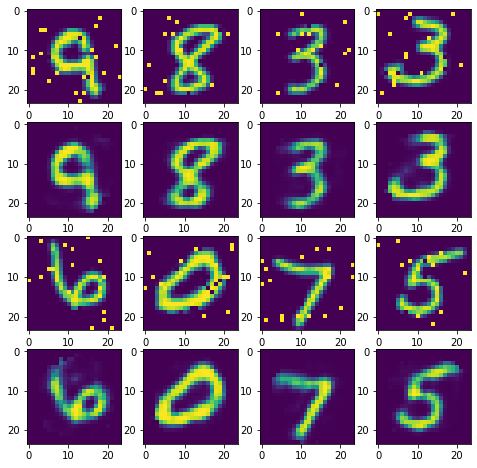

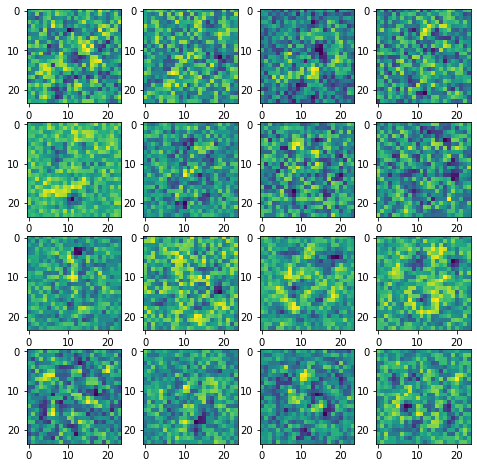

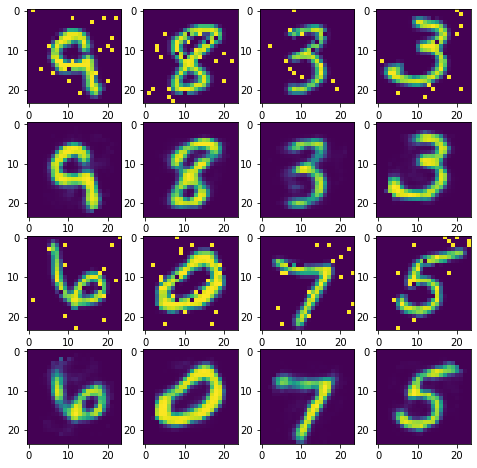

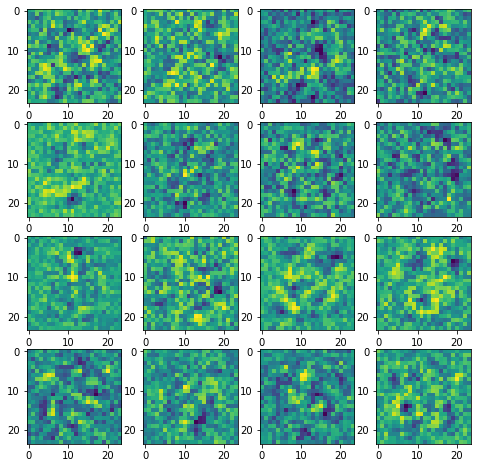

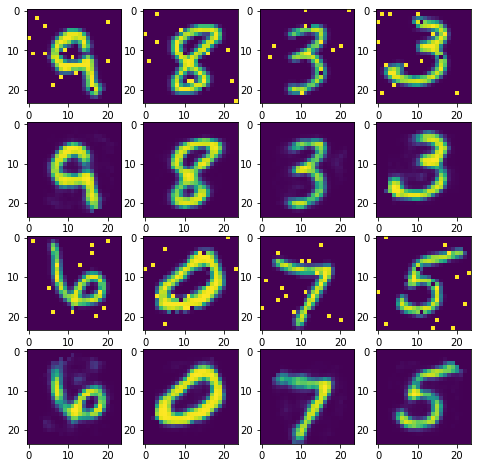

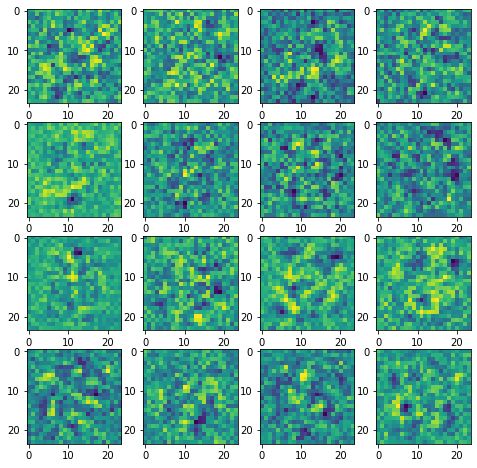

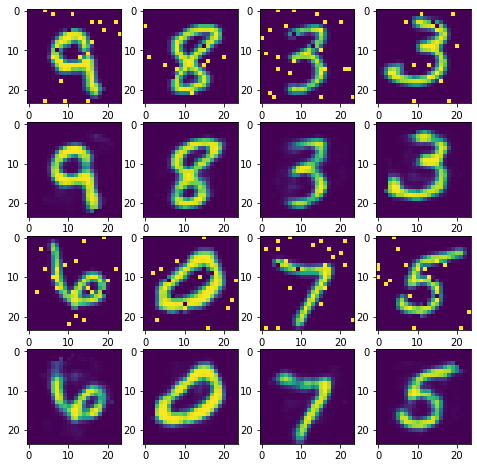

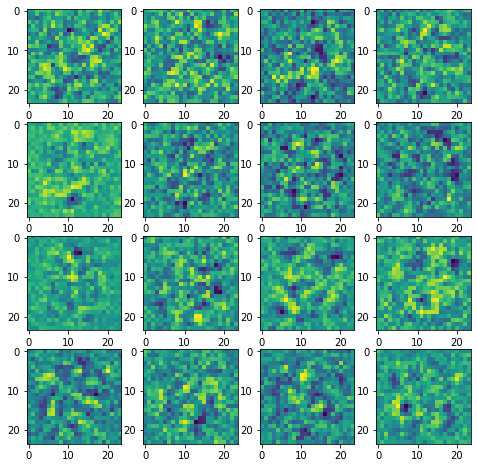

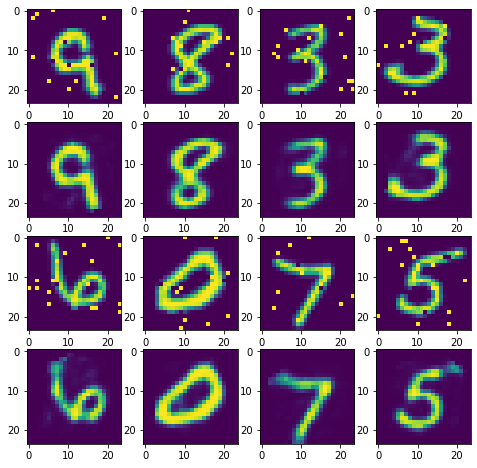

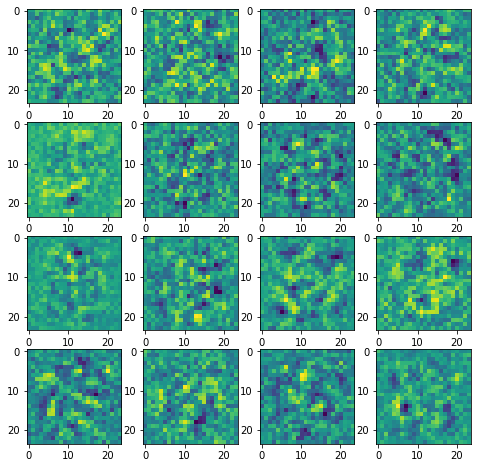

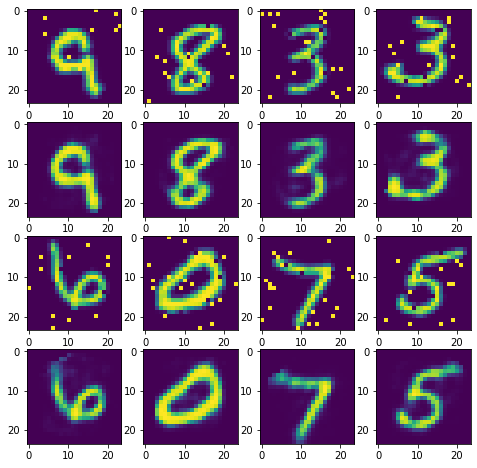

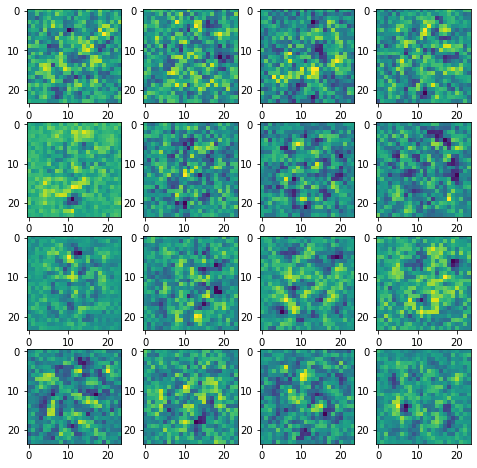

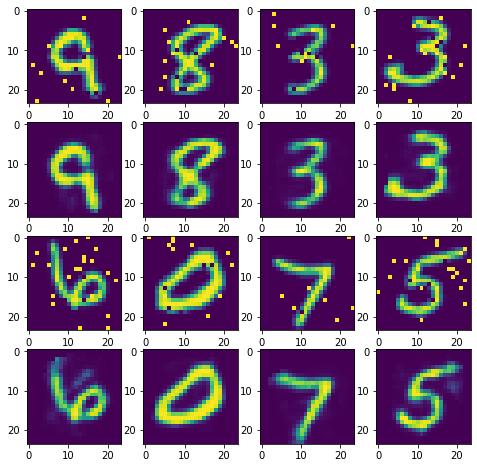

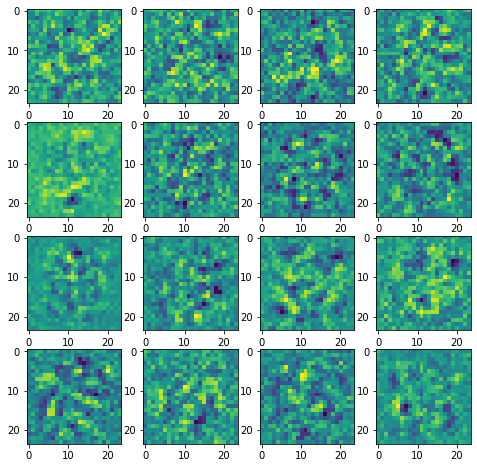

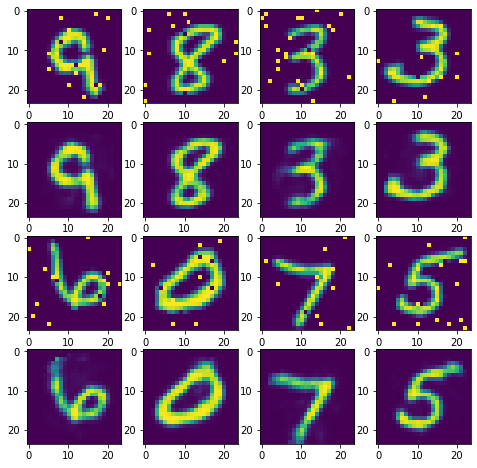

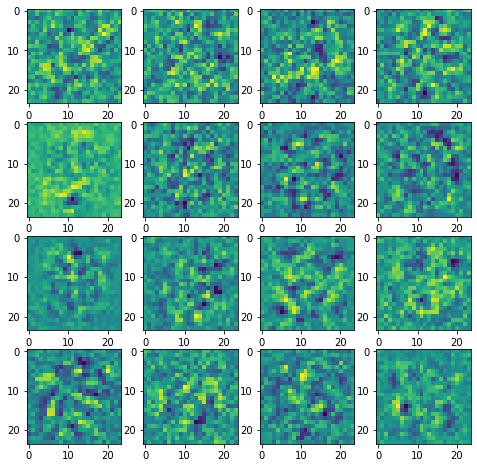

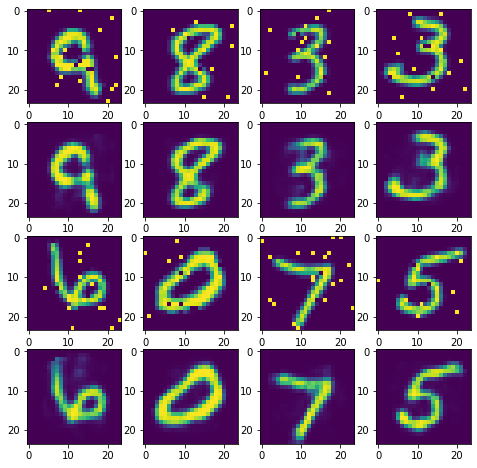

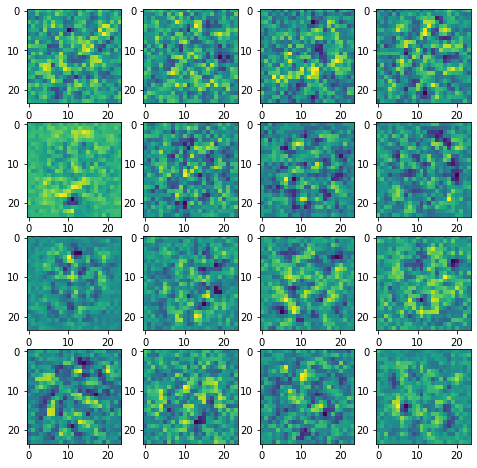

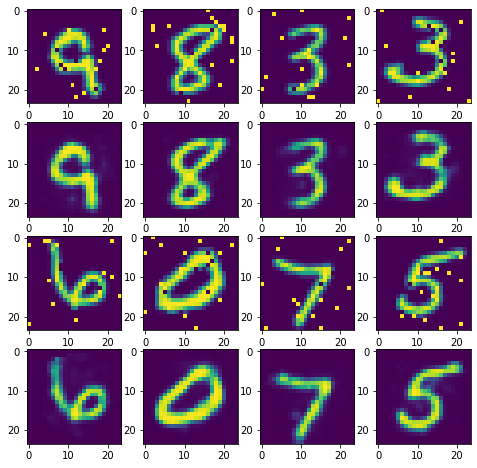

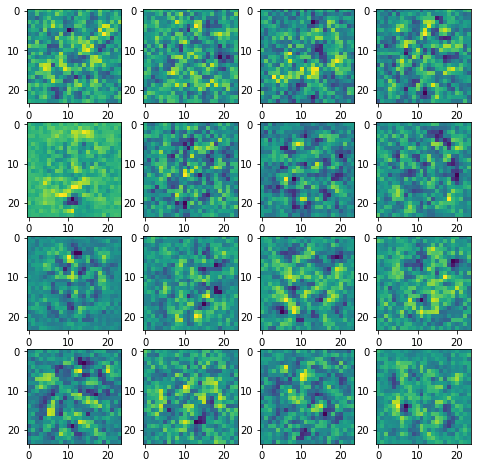

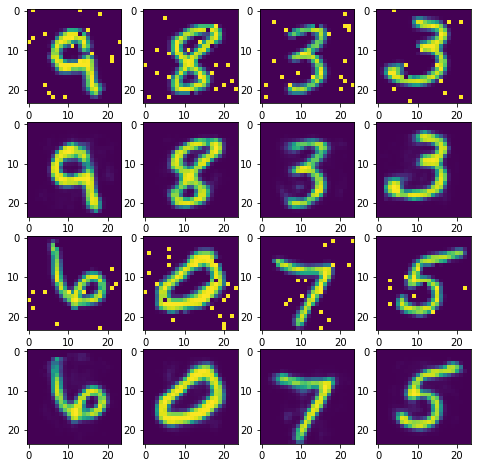

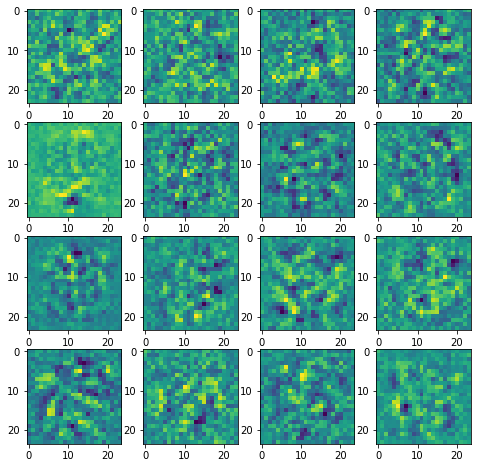

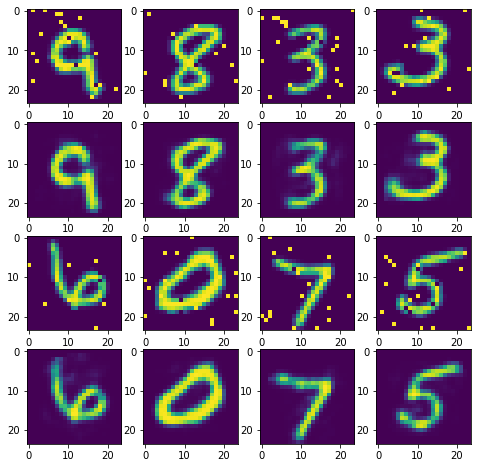

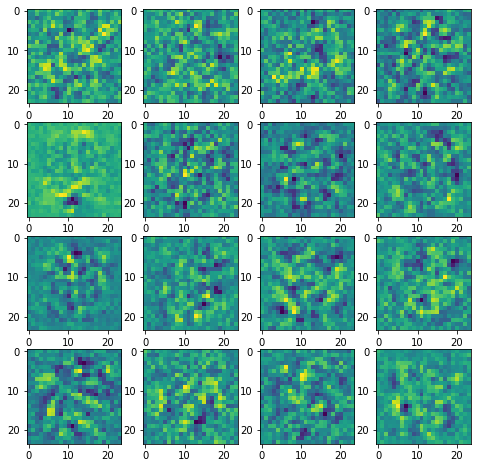

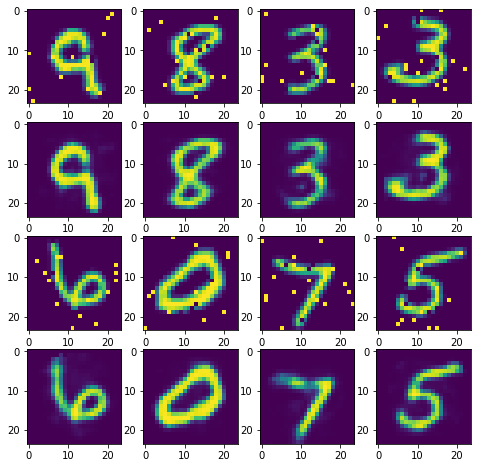

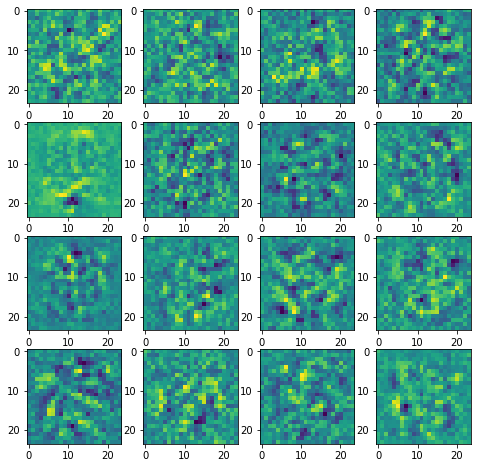

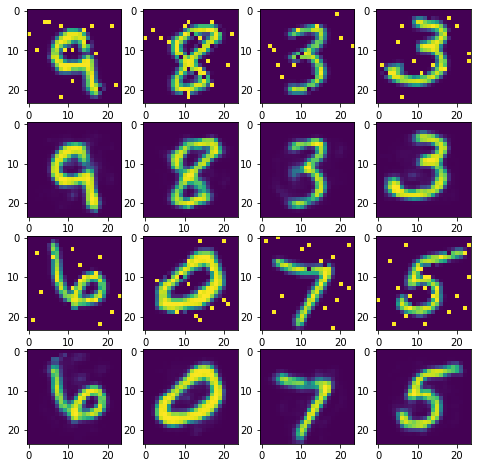

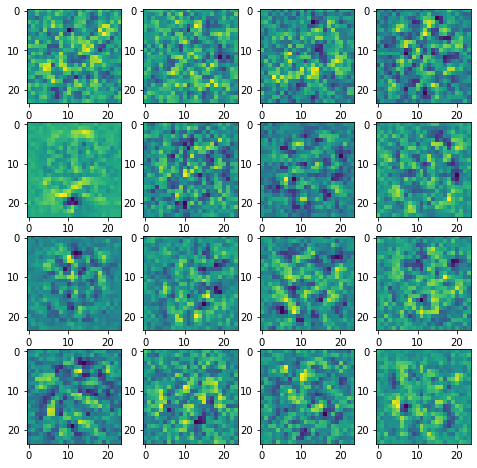

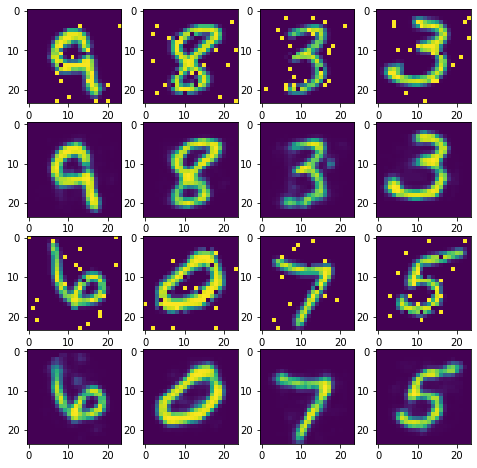

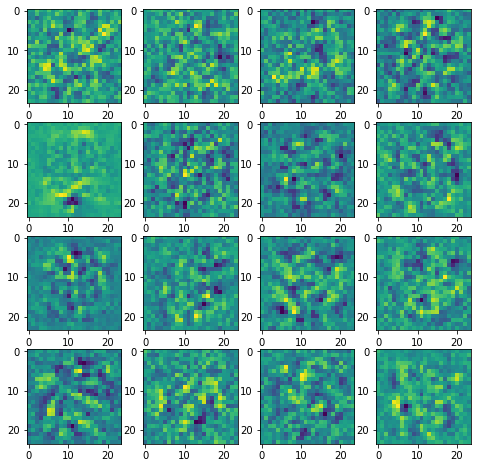

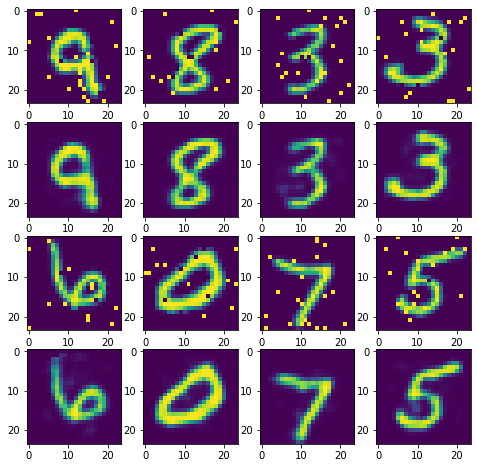

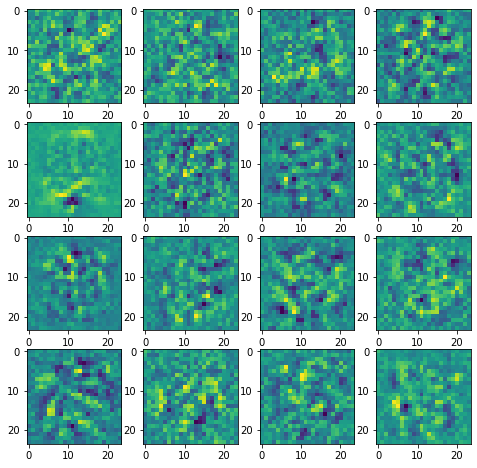

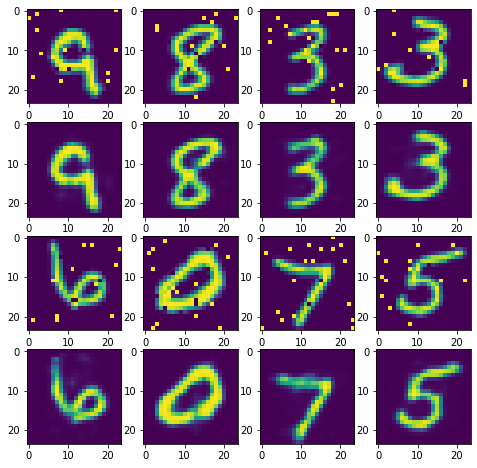

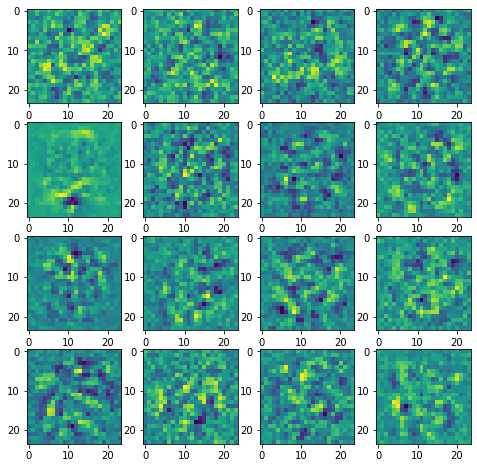

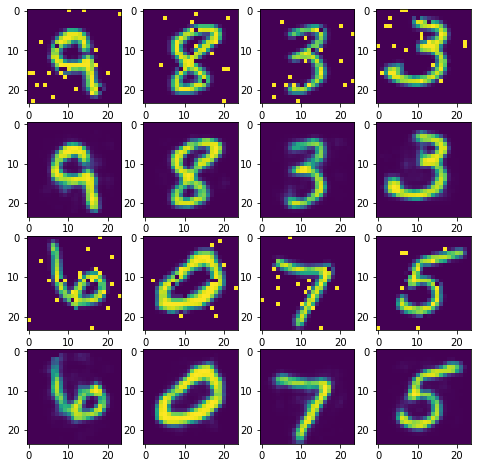

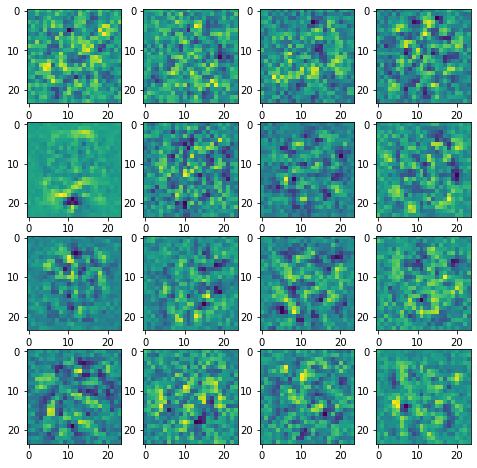

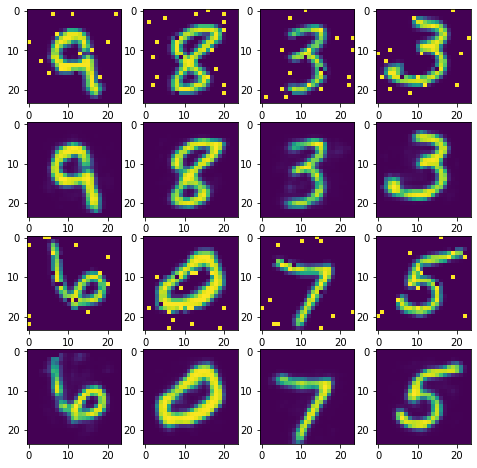

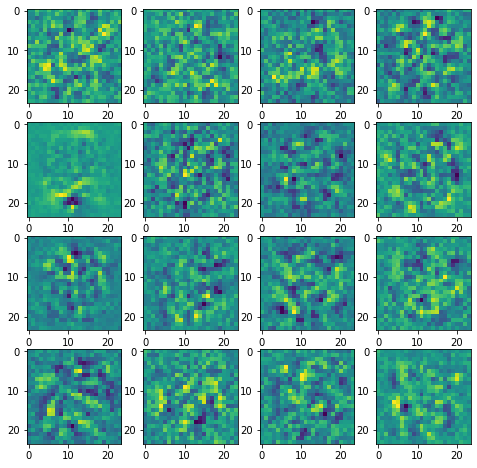

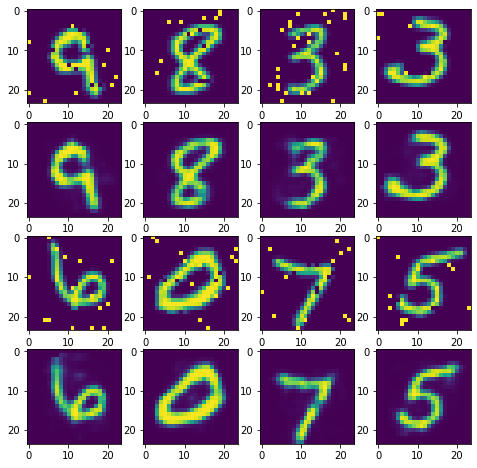

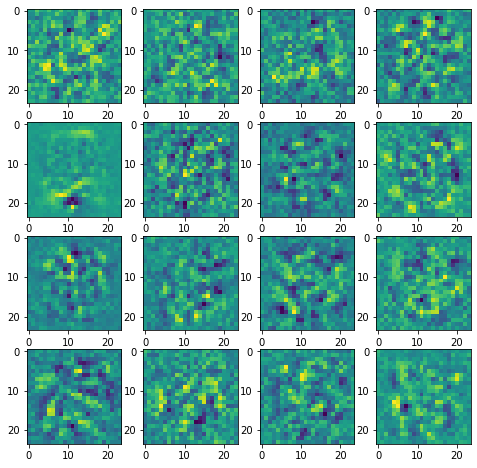

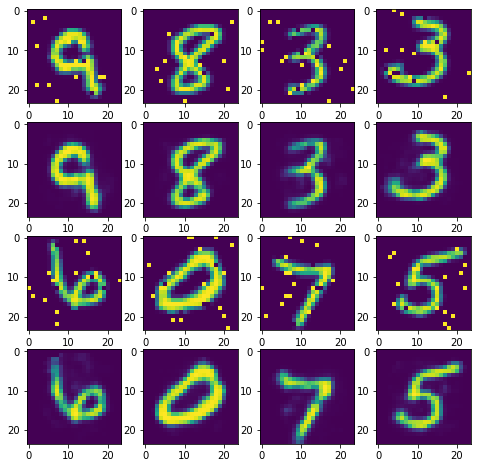

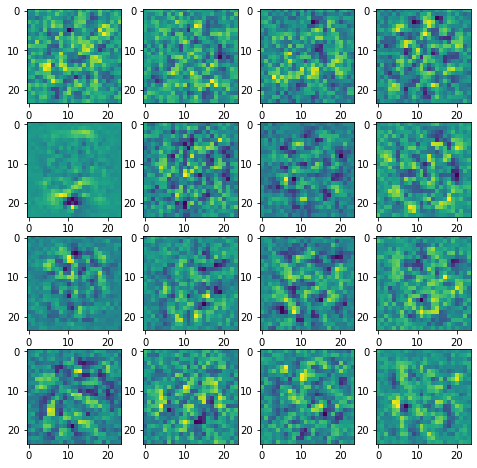

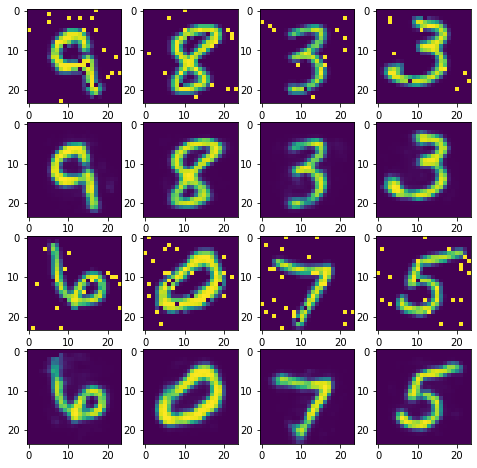

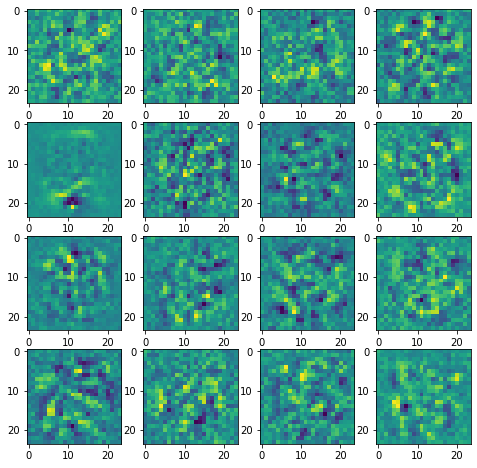

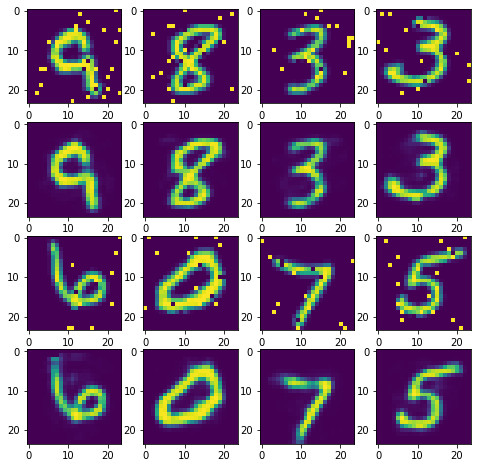

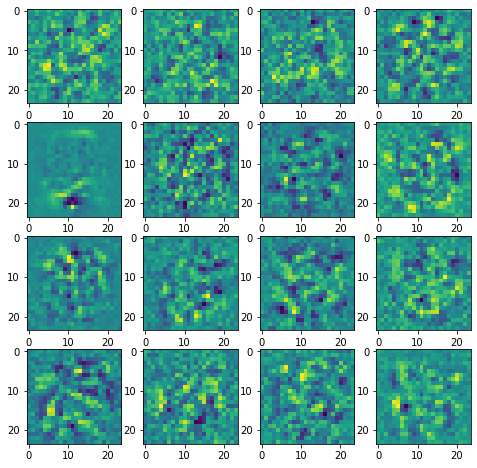

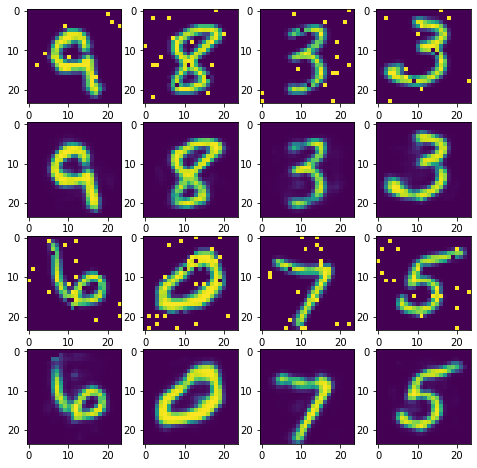

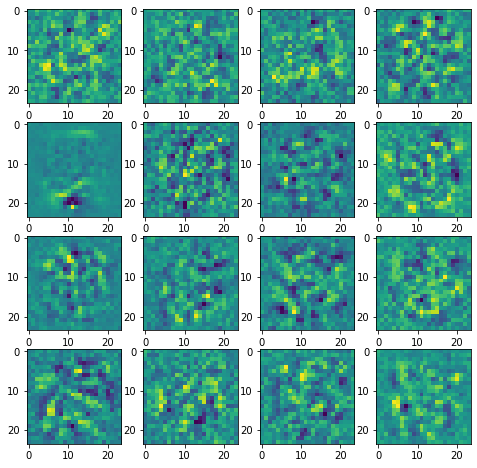

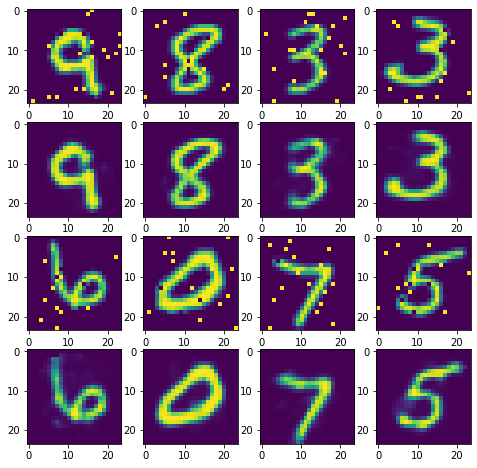

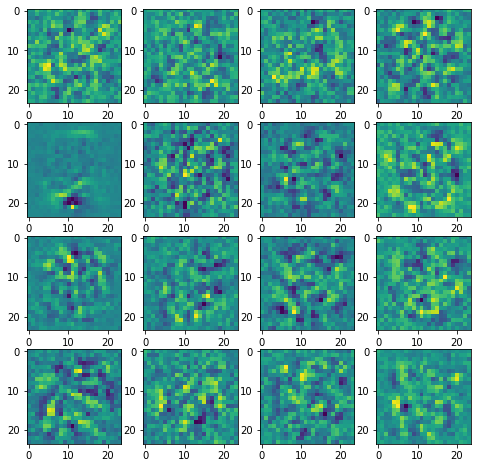

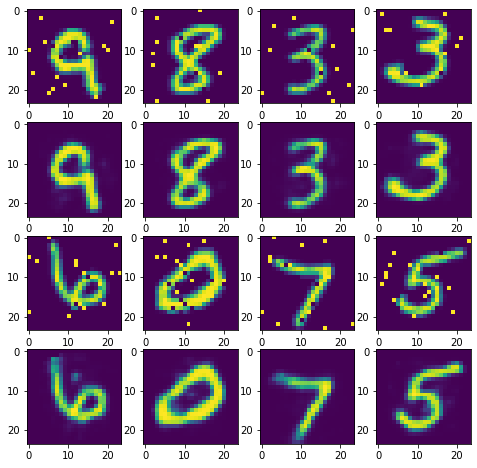

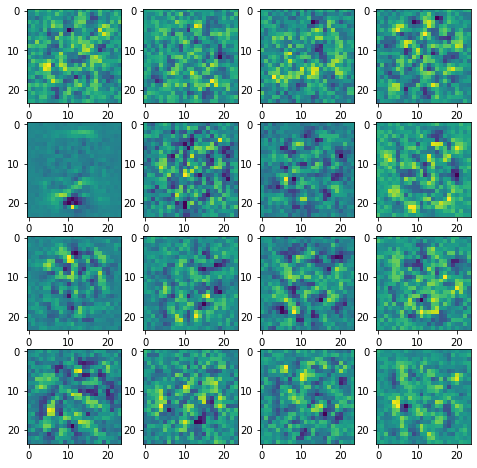

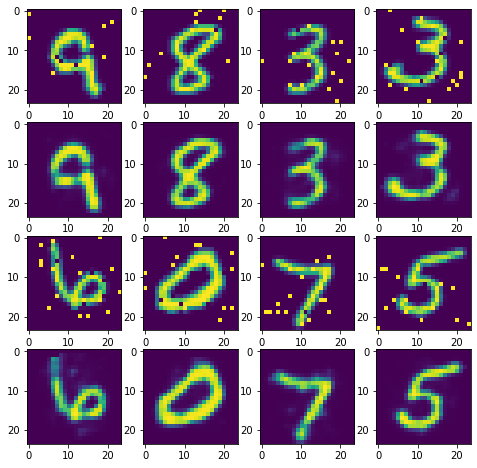

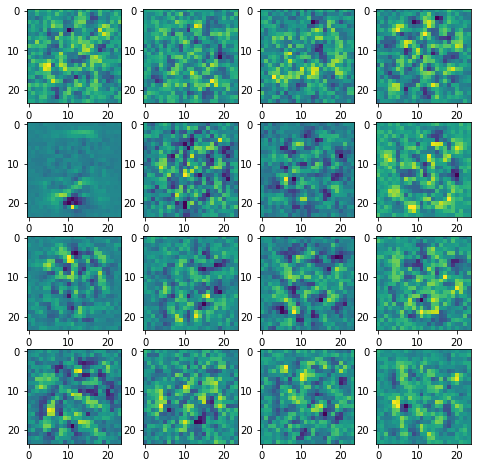

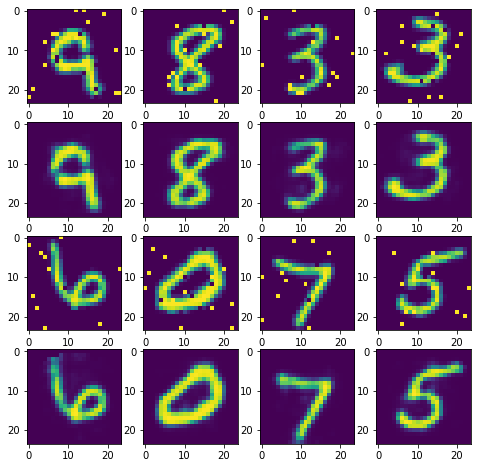

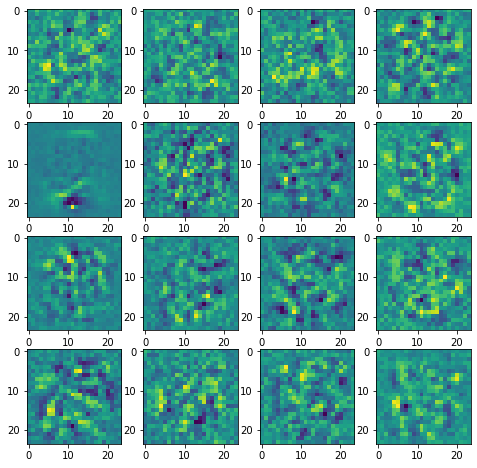

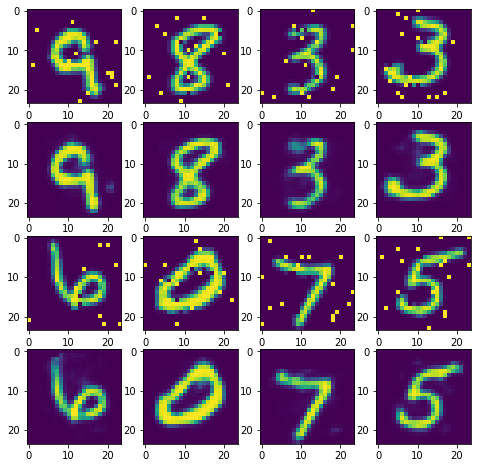

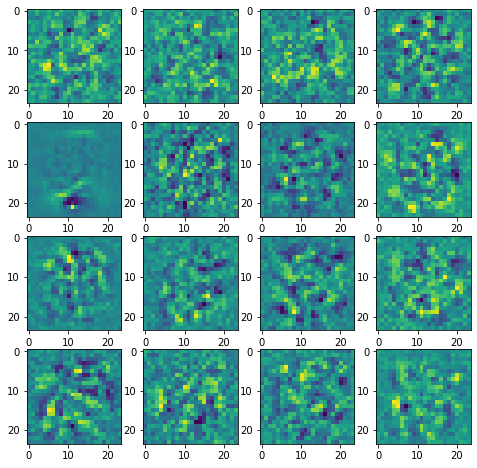

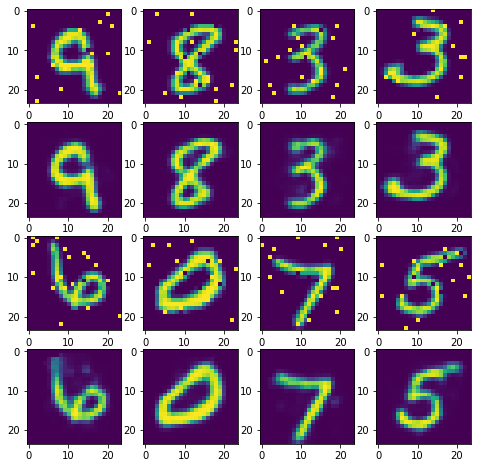

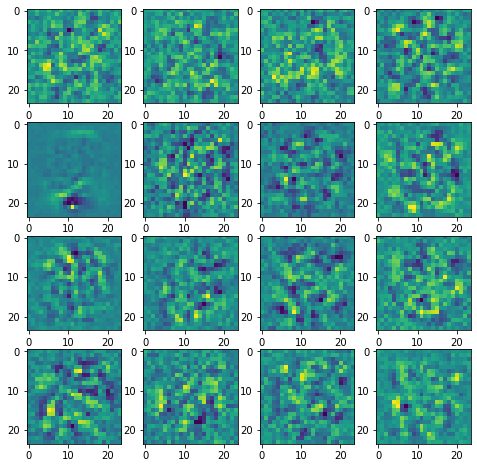

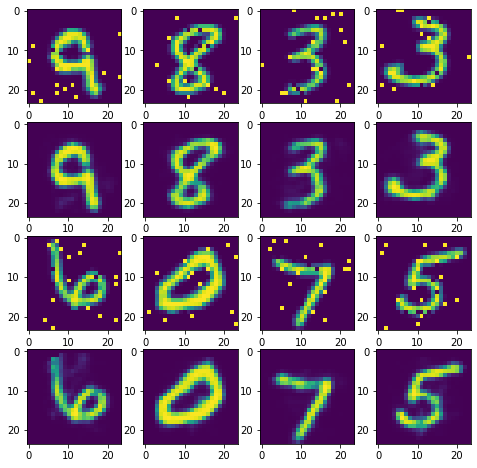

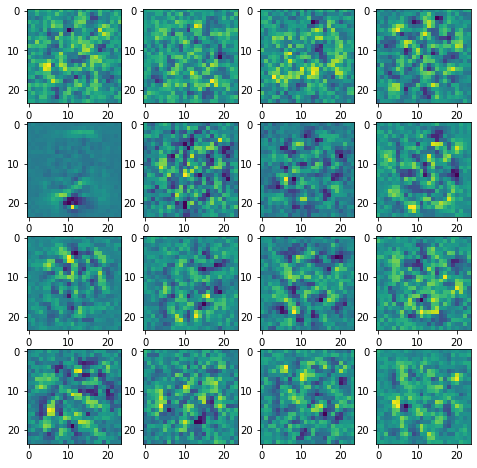

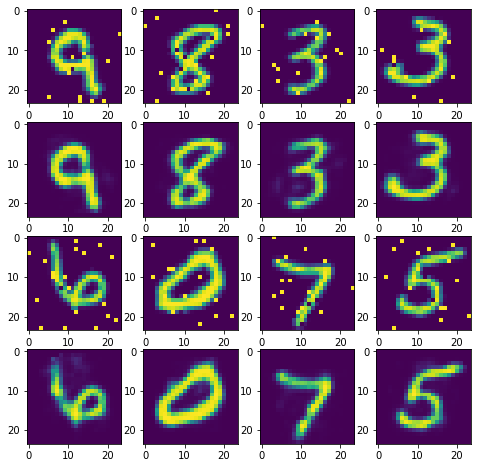

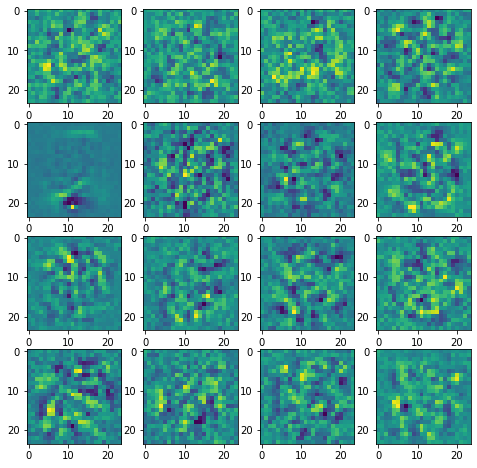

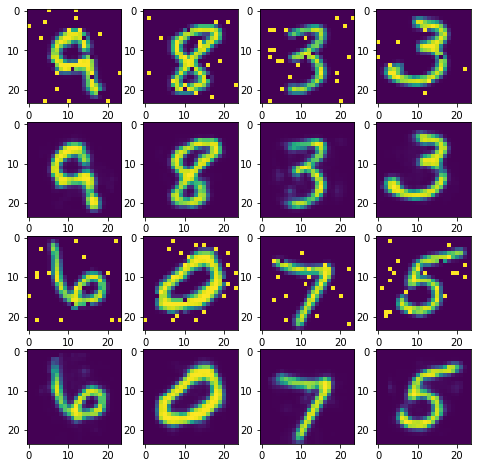

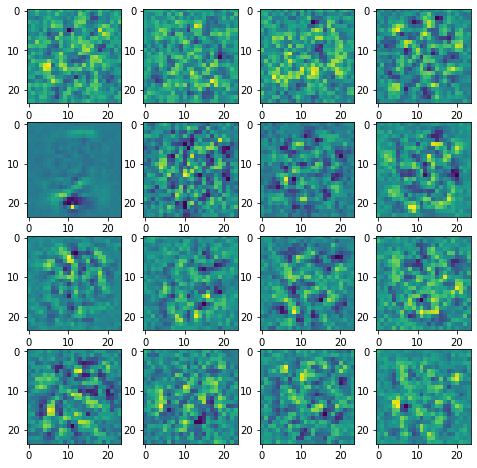

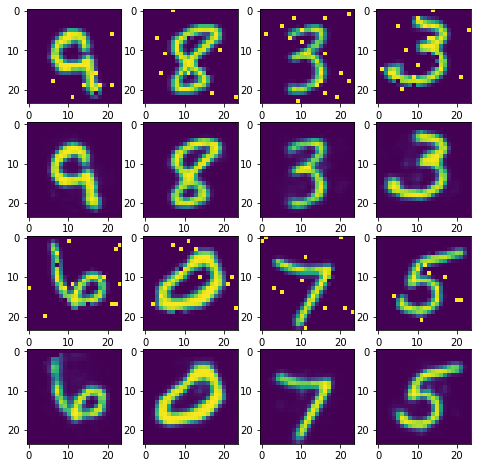

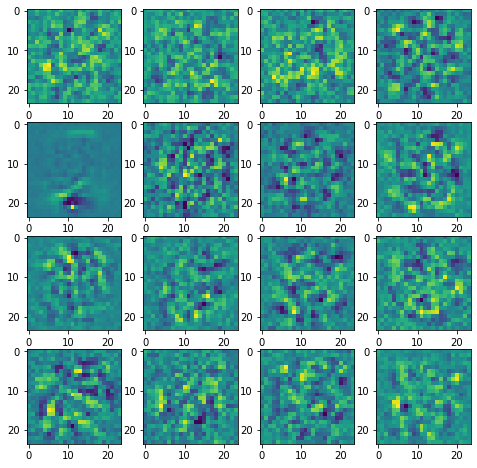

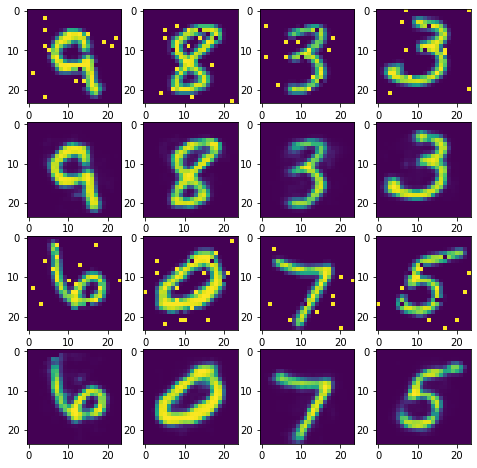

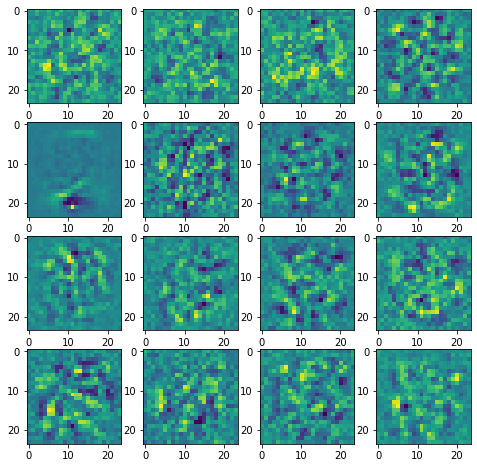

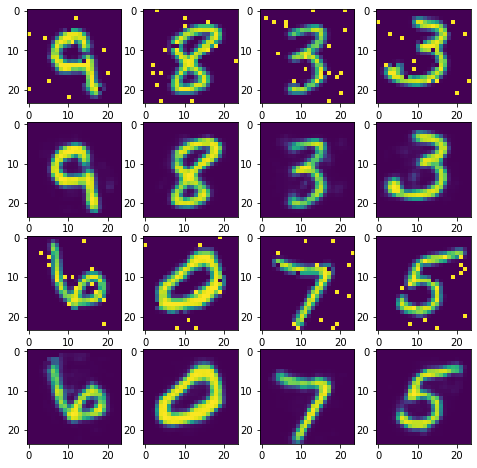

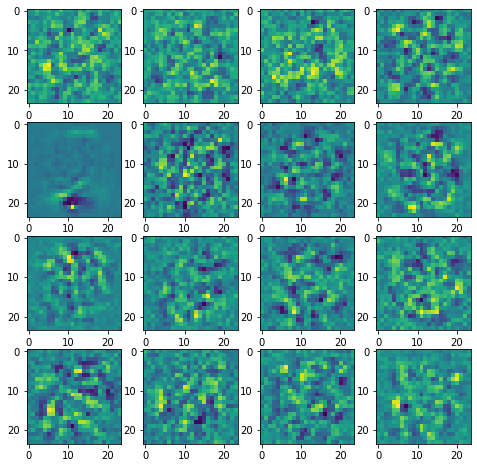

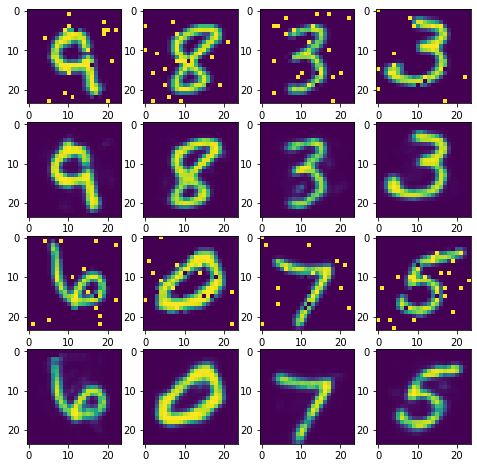

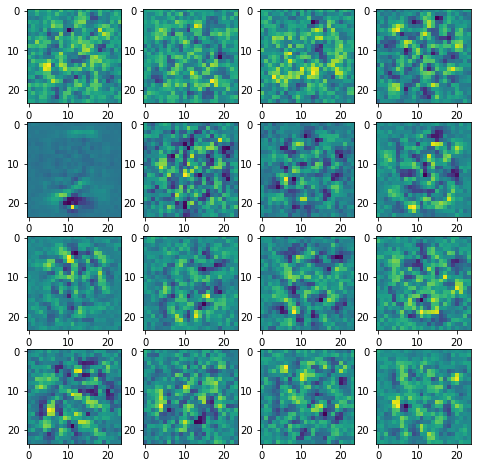

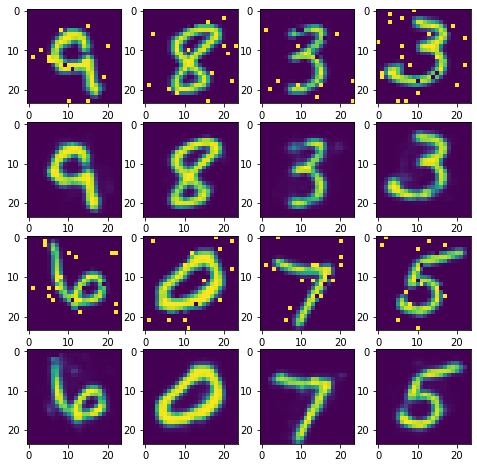

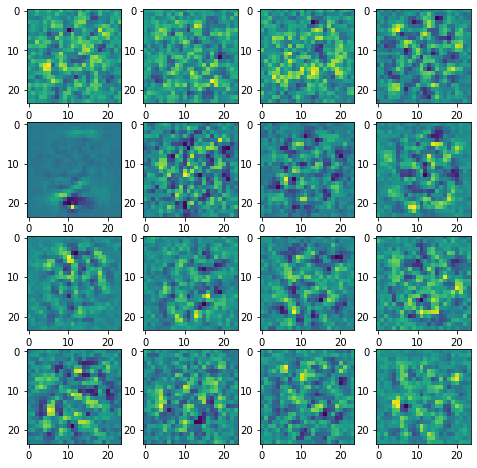

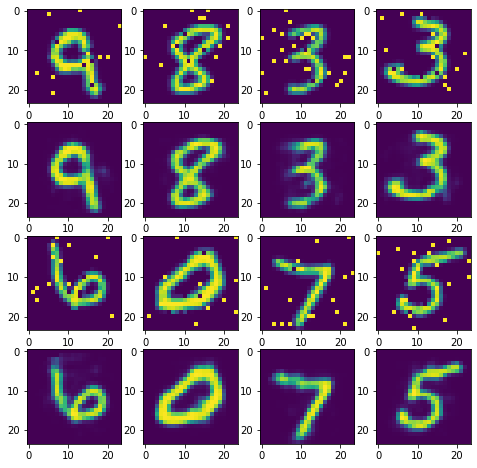

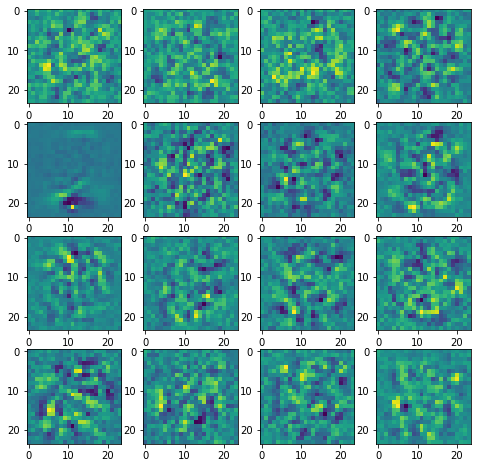

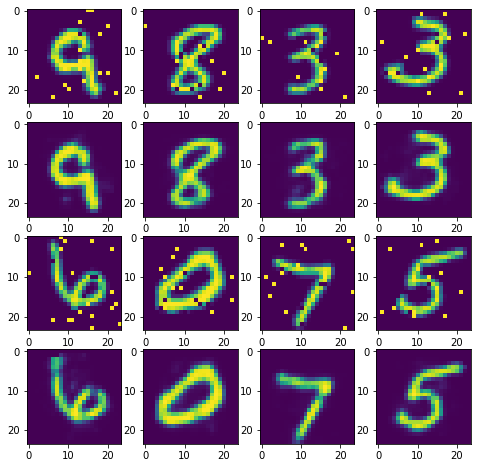

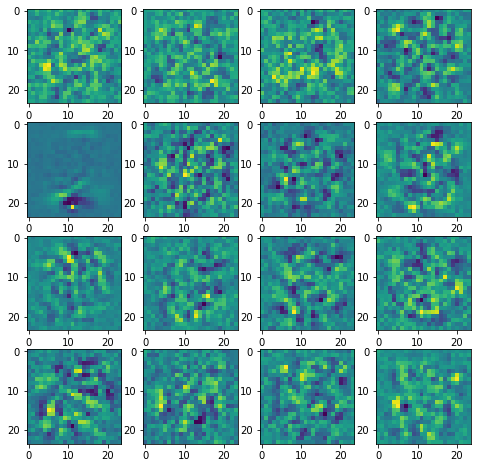

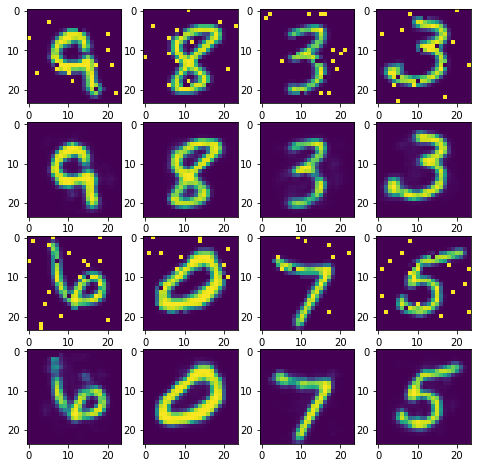

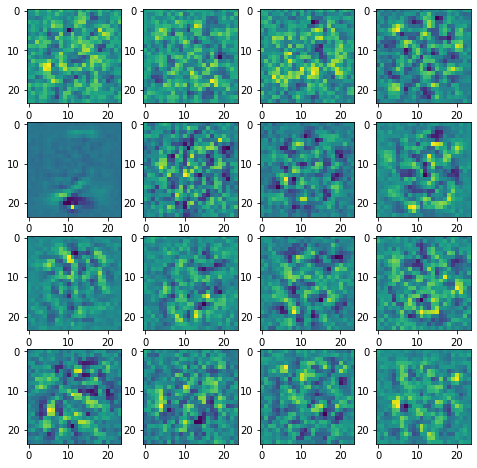

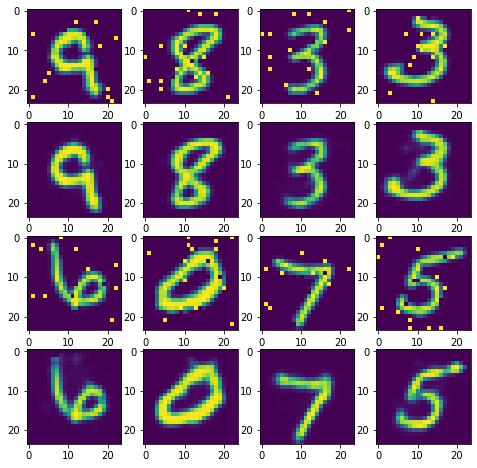

In [ ]:
trainer.setup()
trainer.run()

In [ ]:
def get_children(model: torch.nn.Module):
    children = list(model.children())
    flatt_children = []
    if children == []:
        return model
    else:
        for child in children:
            try:
                flatt_children.extend(get_children(child))
            except TypeError:
                flatt_children.append(get_children(child))
    return flatt_children

print(get_children(trainer.model.network))

In [ ]:

loss = 0
for i in get_children(trainer.model.network):
    print(i)
    values = torch.nn.ReLU((i(img)))
    loss += torch.mean(torch.abs(values))
print(loss)

In [15]:
og, _ = next(iter(trainer.val_loader))

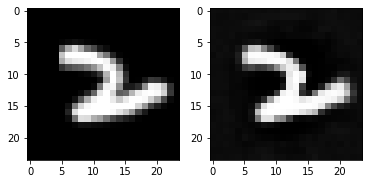

In [16]:
with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.imshow(og[0].squeeze(), cmap="gray")
    img = og.to(trainer.device)
    encoded, recon = trainer.model.network(img)
    plt.subplot(1, 2, 2)
    plt.imshow(recon.cpu().detach()[0].squeeze(), cmap="gray")


In [17]:
first_fc_layer = list(trainer.model.network.encoder.children())[1].weight.cpu().detach()

In [18]:
first_fc_layer.view(-1, 24, 24).shape

torch.Size([128, 24, 24])

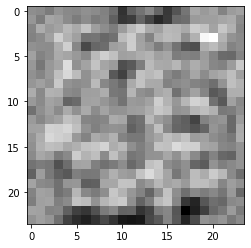

In [22]:

plt.imshow(first_fc_layer.view(-1, 24, 24)[10], cmap='gray');